In [ ]:
import pickle

# nlp
!conda install -c conda-forge bertopic
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# visualizations
!conda install -c conda-forge plotly
!conda install -c conda-forge python-kaleido


In [ ]:
import os
from bertopic import BERTopic
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords as stop_words
from datetime import datetime
from IPython.display import SVG, HTML, display

In [ ]:
base_dir = "C:/Users/Boulanger/ownCloud/Langfristvorhaben/Legal-Theory-Graph/Data"
corpus_dir = os.path.join(base_dir, "FULLTEXTS/JLS/jls-txt")
d2y = pd.read_csv('data/jls-doi-to-year.csv')
stopwords=set(stop_words.words('english'))
stopwords.update({'jstor','conditions','terms','use','content'})

In [ ]:
# Load the articles
articles = []
timestamps = []
not_found = []
for filename in tqdm(os.listdir(corpus_dir)):
    if filename.endswith(".txt"):
        with open(os.path.join(corpus_dir, filename), "r", encoding="utf-8") as f:
            article = f.read()
            tmp_article = []
            doi = filename.strip(".txt").replace("_","/")
            year = d2y.loc[d2y['DOI'] == doi, 'year']
            if year.empty:
                year = d2y.loc[d2y['DOI'] == f"{doi}.x", 'year']
            # only use articles for which we have a year
            if not year.empty:
                timestamp = datetime.strptime(str(year.values[0]), '%Y').date()
                timestamps.append(timestamp)
                for word in str(article).split():
                    if word.lower() not in stopwords and not word.isnumeric():
                        tmp_article.append(word)
                articles.append(' '.join(tmp_article))
            else:
                not_found.append(doi)

earliest_year = min(timestamps).strftime('%Y')
latest_year = max(timestamps).strftime('%Y')

print(f"Corpus has {len(articles)} articles from {earliest_year} to {latest_year}. Date information is missing for {len(not_found)} articles.")

In [ ]:
model: BERTopic = BERTopic(verbose=True)
topics, probs = model.fit_transform(articles)

In [ ]:
# persist model data for later use
with open('cache/data.pkl', 'wb') as file:
    pickle.dump((model, topics, probs, timestamps), file)

In [ ]:
# Load the model data from disk.
with open('cache/data.pkl', 'rb') as file:
    model, topics, probs, timestamps = pickle.load(file)

In [12]:
model.get_topic_info()

,Topic,Count,Name
0,-1,423,-1_law_legal_social_cit
1,0,253,0_law_legal_social_society
2,1,91,1_children_family_child_parents
3,2,71,2_aid_social_legal_welfare
4,3,69,3_education_law_legal_students
5,4,48,4_regulatory_regulation_safety_compliance
6,5,44,5_women_feminist_gender_law
7,6,43,6_government_state_public_british
8,7,36,7_ireland_northern_irish_political
9,8,34,8_housing_local_property_law


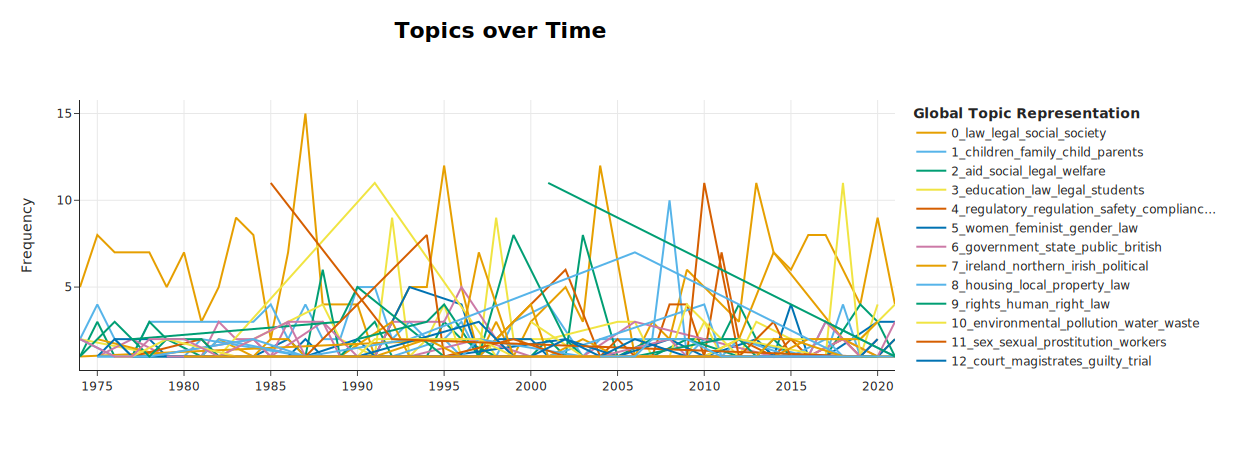

In [14]:
if 'topics_over_time' not in locals():
    topics_over_time = model.topics_over_time(articles, timestamps)
fig = model.visualize_topics_over_time(topics_over_time)
#fig.write_html("figure/topics-over-time.html")
display(SVG(fig.to_image(format="svg")))

In [ ]:
fig = model.visualize_documents(articles)
#fig.write_html("figure/document-topics.html")
#display(SVG(fig.to_image(format="svg")))